# Data Partitioning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from SODA import SODA

The *input_id* corresponds to the dataset used in this analysis. (See *Input* directory for more information)

In [2]:
input_id = 1

In [3]:
min_granularity = 1
max_granularity = 6
pace = 1

### Load Reduced Features from *Dimensionality_Reduction* Stage

In [4]:
with open('Kernel/reduced_features_{}.pkl'.format(input_id), 'rb') as f:
    reduced_features = pickle.load(f)

### Executing SODA Data Partitioning Algorithm

In [5]:
SODA_input = {'ReducedFeatures': reduced_features,
             'ID': input_id}

In [6]:
SODA_parameters = SODA(SODA_input, min_granularity, max_granularity, pace)

Processing granularity 1
Processing granularity 2
Processing granularity 3
Processing granularity 4
Processing granularity 5
Processing granularity 6


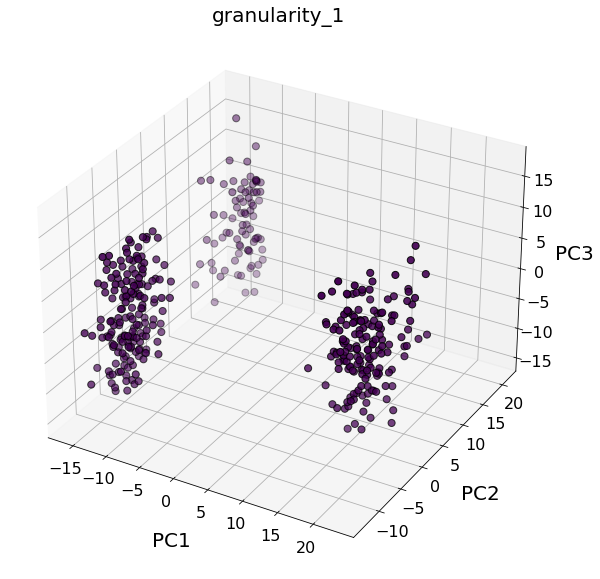

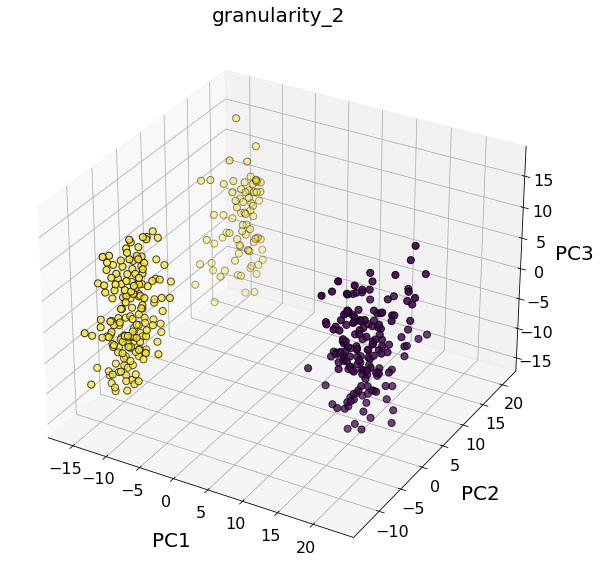

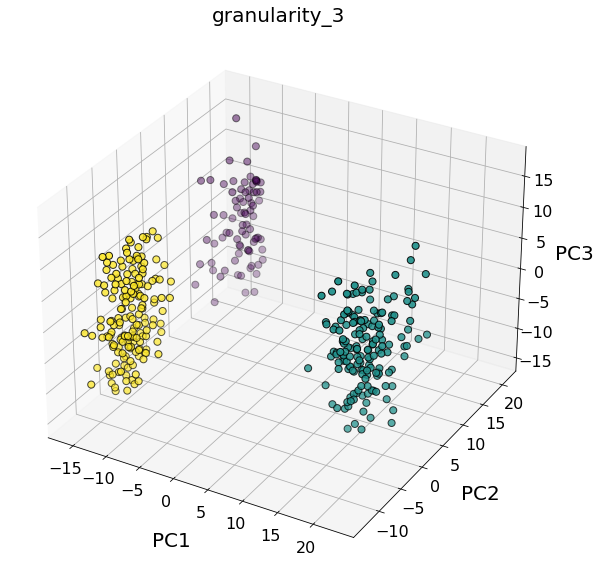

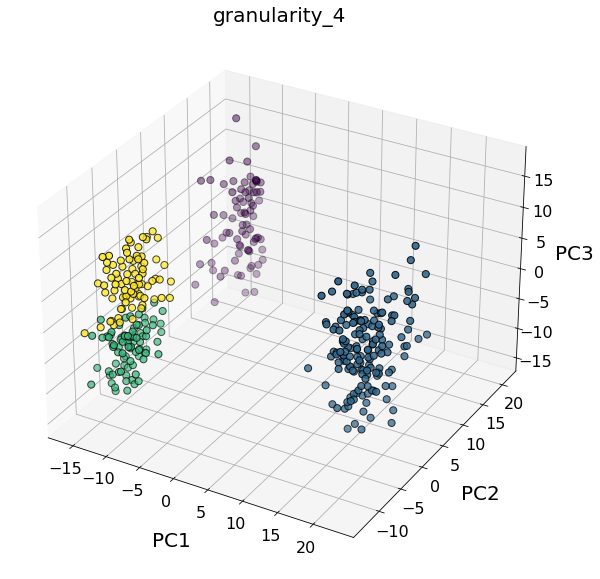

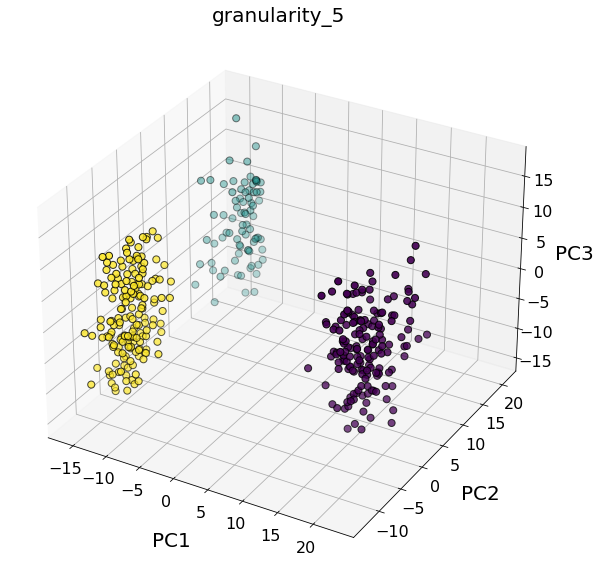

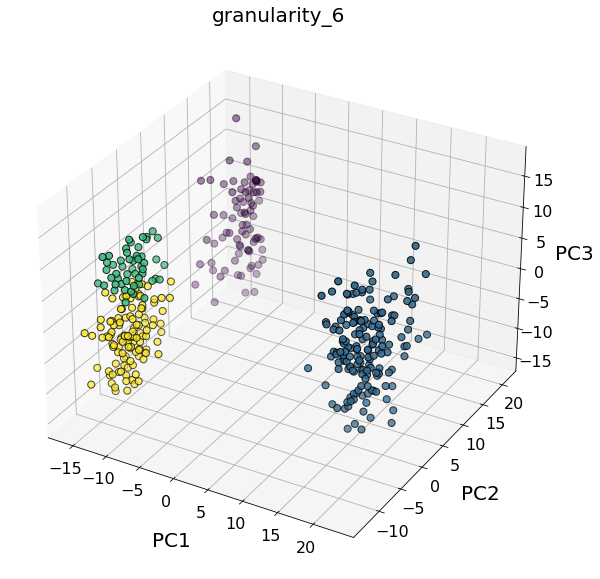

In [7]:
#Ploting the projected data
gra = list(SODA_parameters.keys())[:-1]

x = reduced_features[:,0]
y = reduced_features[:,1]
z = reduced_features[:,2]
                    
for g in gra:
    fig = plt.figure(figsize=[14,10])
    ax = fig.add_subplot(111, projection='3d')

    colors = SODA_parameters[g]
    ax.scatter(x, y, z, c=colors, s=50, edgecolor='k')
    
    plt.title(g, fontsize=20)
    plt.ylabel('PC2',fontsize = 20,labelpad=18)
    plt.xlabel('PC1',fontsize = 20, labelpad=18)
    ax.set_zlabel('PC3', fontsize = 20, labelpad=12)
    plt.tick_params(axis='x', labelsize=16)
    plt.tick_params(axis='y', labelsize=16)
    plt.tick_params(axis='z', labelsize=16)
    ax.grid()
    plt.show()
    fig.savefig('SODA_Plots/Scatter_SODA_{}_{}.png'.format(input_id,g), bbox_inches='tight')                

### Saving files for next stages

In [8]:
with open('Kernel/SODA_parameters_{}.pkl'.format(input_id), 'wb') as f:
    pickle.dump(SODA_parameters, f)